In [2]:
import pandas as pd, numpy as np

In [3]:
ro=['5765358043206','9812808043220','9576658043223','1699958043227','7225068043228','265208043229']
hu=['8073718043234','2087988043232','6247548043235']

In [4]:
stations=[]
for i in ro+hu:
    stations.append(pd.read_csv(i+'stn+.txt',delimiter= '+',skiprows=2,header=None))
    print(i)

5765358043206
9812808043220
9576658043223
1699958043227
7225068043228
265208043229
8073718043234
2087988043232
6247548043235


In [5]:
station=pd.concat(stations)

In [6]:
station=station.drop_duplicates()

In [7]:
station[2]=station[2].str.strip()

In [195]:
dfs=[]
for i in ro+hu:
    df=pd.read_csv(i+'dat.txt',delimiter= '\s+')
    df=df.replace({'******':np.nan,'*****':np.nan,'****':np.nan,'***':np.nan,'**':np.nan,'*':np.nan})
    df['time']=pd.to_datetime(df['YR--MODAHRMN'],format='%Y%m%d%H%M')
    df=df[['time','USAF','SPD','TEMP','PCP06','SD','MW','AW','W']]
    df['TEMP']=(pd.to_numeric(df['TEMP'], errors='coerce')-32)*5/9
    df['SPD']=pd.to_numeric(df['SPD'], errors='coerce')*1.61
    df['PCP06']=pd.to_numeric(df['PCP06'], errors='coerce')*25.4
    df['SD']=pd.to_numeric(df['SD'], errors='coerce')*25.4
    dfs.append(df)
    print(i)

5765358043206
9812808043220
9576658043223
1699958043227
7225068043228
265208043229


C:\ProgramData\Anaconda3\envs\plotly\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (4,11,12,21,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.



8073718043234
2087988043232


C:\ProgramData\Anaconda3\envs\plotly\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (4,11,12,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.



6247548043235


In [200]:
dfs=pd.concat(dfs)

In [201]:
dfs=dfs.drop_duplicates()

In [202]:
dfs.to_csv('data/all.csv')

In [8]:
# dfs=pd.read_csv('data/all.csv')

In [9]:
dfs['time']=pd.to_datetime(dfs['time'])
dfs['year']=dfs['time'].dt.year
dfs['month']=dfs['time'].dt.month
dfs['day']=dfs['time'].dt.day
dfs['hour']=dfs['time'].dt.hour

In [10]:
df=dfs.groupby(['USAF','year','month','day','hour'])[['TEMP','SPD','SD','PCP06']]

In [11]:
df_avg=df.mean()

In [12]:
df_avg.columns=['temp_avg','spd_avg','snow_avg','rain_avg']

In [13]:
df_avg=np.round(df_avg,1)

In [14]:
#keep only months with at least 6 days to avoid anomalies (20%)
filt=df_avg.reset_index().groupby(['USAF','year','month'])[['day']].nunique()
filt2=filt[filt>5].dropna()

In [22]:
#keep only years with at least 3 months to avoid anomalies (20%)
filt3=filt2.reset_index().groupby(['USAF','year'])[['month']].nunique()
filt4=filt3[filt3>3].dropna()

In [16]:
df_avg2=df_avg.reset_index().set_index(['USAF','year'])

In [23]:
dfz={}

In [24]:
for i in filt4.index.unique(0):
    d=df_avg2.loc[i].loc[filt4.loc[i].index.unique()]
    dfz[i]=d
    d.to_csv('data/'+str(i)+'.csv')
    print(i)

119000
127560
127660
127720
127860
128050
128120
128150
128220
128250
128300
128305
128310
128360
128380
128390
128400
128430
128460
128470
128510
128550
128600
128603
128605
128660
128700
128820
128920
129100
129150
129200
129220
129250
129255
129300
129320
129350
129400
129410
129420
129500
129600
129700
129820
129920
150000
150001
150002
150010
150040
150070
150090
150100
150105
150140
150150
150200
150230
150235
150250
150320
150330
150400
150410
150420
150440
150470
150520
150550
150560
150630
150690
150730
150750
150800
150830
150850
150880
150890
150900
150940
150950
150990
151070
151080
151090
151110
151130
151170
151180
151190
151200
151205
151230
151240
151270
151320
151340
151360
151380
151400
151430
151450
151455
151480
151500
151540
151580
151590
151600
151620
151630
151650
151680
151700
151740
151790
151820
151840
151890
151940
151970
151990
152000
152005
152040
152060
152080
152090
152120
152150
152170
152190
152210
152300
152310
152350
152380
152410
152450
152470
152540

In [60]:
stationc=station.set_index(0)[2]

In [64]:
stationx={}
for z in dfz:
    stationx[stationc.loc[z]]={'id':z,'yrs':len(dfz[z].index.unique())}

In [72]:
pd.DataFrame(stationx).T.reset_index().set_index('yrs').sort_index(ascending=False)[:40]

,index,id
yrs,,
72,AUREL VLAICU,154200
68,GALATI,153100
67,CLUJ NAPOCA,151200
67,DROBETA TURNU SEVERIN,154100
66,CONSTANTA,154800
65,SULINA,153600
63,SATU MARE,150100
63,VARFU OMU,152800
63,DEBRECEN,128820


In [165]:
dds=[]
indicator='temp_avg'
for a in [151200,128820,129820,152600,128390,151700,154800,154200,150800,127720]:
# for a in [151200]:
    dw=dfz[a]
    tmean=dw.groupby(['month','hour']).mean()[[indicator]]
    tmean.columns=['temp_mean']
    dw=dw.loc[1980:]
    dw=dw.loc[:2010]
    tmean80=dw.groupby(['month','hour']).mean()[[indicator]]
    tmean80.columns=['temp_mean80']
    dc=dfz[a].groupby(['year','month','hour']).mean()[[indicator]].join(tmean).join(tmean80)
    dc['temp_delta']=dc[indicator]-dc['temp_mean']
    dc['temp_delta80']=dc[indicator]-dc['temp_mean80']
    dd=dc.groupby(['year']).mean()
    dd=np.round(dd,1)
    dd['varos']=stationc[a]
#     dd['varos']='153100'
    dds.append(dd)

In [166]:
ddb=pd.concat(dds)
ddb.to_csv('stripes/test.csv')

In [161]:
dds=[]
indicator='temp_avg'
# for a in [151200,128820,129820,152600,128390,151700,154800,154200,150800,127720]:
for a in [151700]:
    dw=dfz[a]
    dw=dw.loc[1980:]
    dw=dw.loc[:1995]
    tmean=dw.groupby(['month','hour']).mean()[[indicator]]
    tmean.columns=['temp_mean']
    dw=dfz[a]
    dw=dw.loc[2000:]
    dw=dw.loc[:2015]
    tmean80=dw.groupby(['month','hour']).mean()[[indicator]]
    tmean80.columns=['temp_mean80']
    dc=tmean.join(tmean80)
    dc['temp_delta']=dc['temp_mean80']-dc['temp_mean']
    dd=np.round(dc,1)
    dd['varos']=stationc[a]
#     dd['varos']='153100'
    dds.append(dd)

In [162]:
ddb=pd.concat(dds)
ddb.to_csv('stripes/test.csv')

In [163]:
dds=[]
indicator='temp_avg'
# for a in [151200,128820,129820,152600,128390,151700,154800,154200,150800,127720]:
for a in [151700]:
    dw=dfz[a]
    tmean=dw.groupby(['month','hour']).mean()[[indicator]]
    tmean.columns=['temp_mean']
    dw=dw.loc[1980:]
    dw=dw.loc[:2010]
    tmean80=dw.groupby(['month','hour']).mean()[[indicator]]
    tmean80.columns=['temp_mean80']
    dc=dfz[a].groupby(['year','month','hour']).mean()[[indicator]].join(tmean).join(tmean80)
    dc['temp_delta']=dc[indicator]-dc['temp_mean']
    dc['temp_delta80']=dc[indicator]-dc['temp_mean80']
    dd=dc.groupby(['year','month']).mean()
    dd=np.round(dd,1)
    dd['varos']=stationc[a]
#     dd['varos']='153100'
    dds.append(dd)

In [164]:
ddb=pd.concat(dds)
ddb.to_csv('stripes/test.csv')

In [190]:
d.to_csv('data/test.csv')

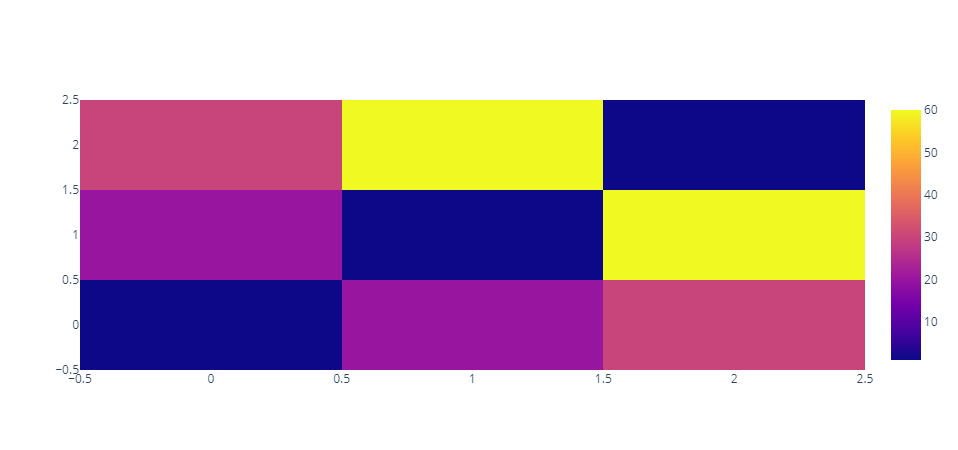

In [2]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                    z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]]))
fig.show()